# 1.2: Compare NNCE with the WG3 scenario uncertainty
In this notebook we compare the NNCE we estimate using the ZEC50/TCRE relationship and the NNCE reflecting scenario uncertainty in the WGIII C1 scenarios.

In [1]:
import pyam
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
plt.style.use('plotting_template.mplstyle')

<IPython.core.display.Javascript object>

# Read in the data

In [2]:
zec_nnce = pd.read_excel(
    Path('processed_data/fig02_proc_nnce_data.xlsx'),
    index_col='Model'
)

Now we read in the WGIII data and pull out the NNCE column from the metadata.

In [3]:
ar6_c1_c2 = pd.read_excel(
    Path('processed_data/fig02_ar6_wg3_data.xlsx'),
    sheet_name='meta',
    index_col=[0,1]
)

# Plot

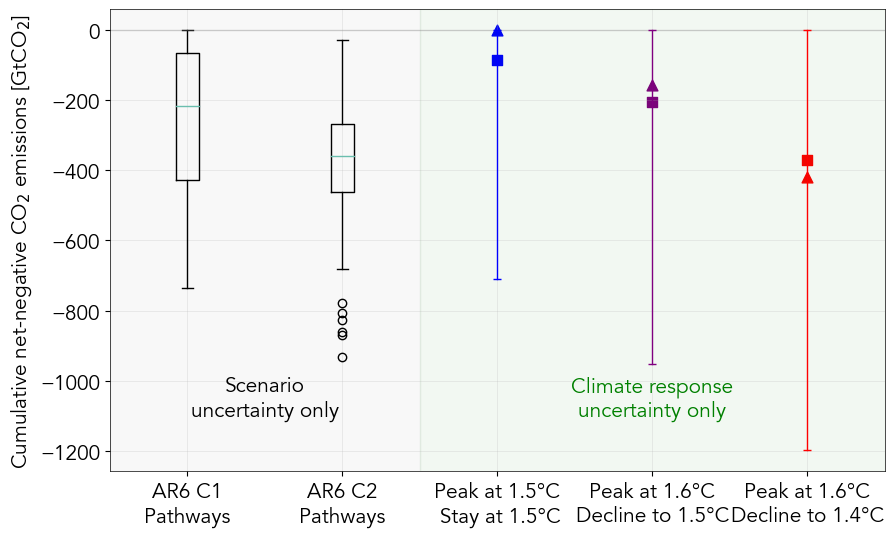

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

labels = []
# Plot scenario uncertainty - AR6 WGIII
for j,cat in enumerate(['C1', 'C2']):
    ar6_nnce = ar6_c1_c2[ar6_c1_c2['Category']==cat]['Cumulative net-negative CO2 (post net-zero, Gt CO2) (Harm-Infilled)']/1e3
    ax.boxplot(
        x=ar6_nnce,
        positions=[j]
    )
    labels.append(f'AR6 {cat}')


# Plot NNCE for 1.5 - 1.5, 1.6 - 1.5, 1.6 - 1.4
up_lo = [
    (1.5,1.5),
    (1.6,1.5),
    (1.6,1.4)
]

colors=['','','blue','purple','red']

i=2
for up, lo in up_lo:
    data = zec_nnce[f'NNCE_{up}_{lo}']
    # Multi-model range
    ax.errorbar(
        x=[i,i],
        y=[data.min(), data.max()],
        marker='_',
        color=colors[i]
    )
    # Multi-model mean and median
    ax.scatter(x=i, y=data.median(), marker='^',s=60,color=colors[i])
    ax.scatter(x=i, y=data.mean(), marker='s', s=60,color=colors[i])
    i+=1

# Add shaded areas for the scenario and climate uncertainty
ax.axvspan(-0.5,1.5, color='grey', alpha=0.05)
ax.annotate(s='Scenario\nuncertainty only', xy=(0.5,-1100), ha='center')
ax.axvspan(1.5,4.5, color='green', alpha=0.05)
ax.annotate(s='Climate response\nuncertainty only', xy=(3,-1100), ha='center',color='green')

ax.set_xlim(-0.5,4.5)

ax.set_xticks(range(5))
ax.set_xticklabels(
    [
        'AR6 C1\nPathways',
        'AR6 C2\nPathways',
        'Peak at 1.5°C\n Stay at 1.5°C',
        'Peak at 1.6°C\nDecline to 1.5°C',
        'Peak at 1.6°C\nDecline to 1.4°C',
    ]
)
ax.grid(0.1)
ax.set_ylabel('Cumulative net-negative CO$_2$ emissions [GtCO$_2$]')
ax.axhline(0, color='grey', alpha=0.3)